#CS412 Homework 2
Celal Canol Taşgın - 20761
ccanol@sabanciuniv.edu

In [ ]:
import pandas as pd
import numpy as np

Read data with pandas and put column names

In [ ]:
from sklearn import datasets
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
mydata = pd.read_csv(url,names=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'FlowerType']) 

In [ ]:
df = pd.DataFrame(mydata)

Seperated data as data & label

In [ ]:
data = df[['SepalLength',	'SepalWidth',	'PetalLength',	'PetalWidth']]
labels = df['FlowerType']
data

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Split Data as 75% training, 25% testing




In [ ]:
from sklearn.model_selection import train_test_split

# Split 75% training, 25% test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25) # X_train -> 75%, X_test -> 25%

#Used Knn algorithm 1 to 10 for finding the best k

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

kVals = range(1, 11)
accuracies = []
for k in kVals: 
  # Train the k-Nearest Neighbor classifier with the current value of k
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, y_train)

  # Evaluate the model on test set 
  test_predictions = model.predict(X_test)
  acc = accuracy_score(y_test, test_predictions)
  f1 = f1_score(y_test, test_predictions, average="weighted")

  print("For k = {:d}, test accuracy = {:.2f}, f1 score = {:.2f}".format(k, acc, f1))
    
  # Update the accuracies list
  accuracies.append(acc)

For k = 1, test accuracy = 0.97, f1 score = 0.97
For k = 2, test accuracy = 0.97, f1 score = 0.97
For k = 3, test accuracy = 0.97, f1 score = 0.97
For k = 4, test accuracy = 0.95, f1 score = 0.95
For k = 5, test accuracy = 0.97, f1 score = 0.97
For k = 6, test accuracy = 0.97, f1 score = 0.97
For k = 7, test accuracy = 0.97, f1 score = 0.97
For k = 8, test accuracy = 1.00, f1 score = 1.00
For k = 9, test accuracy = 0.97, f1 score = 0.97
For k = 10, test accuracy = 0.97, f1 score = 0.97


F1 Score samples when i ran the code 3 times:

|                             | F1 SCORES                   |                             |
|-----------------------------|-----------------------------|-----------------------------|
| First Run:                  | Second Run:                 | Third Run:                  |
| For k = 1, f1 score = 1.00  | For k = 1, f1 score = 0.92  | For k = 1, f1 score = 0.97  |
| For k = 2, f1 score = 1.00  | For k = 2, f1 score = 0.95  | For k = 2, f1 score = 0.92  |
| For k = 3, f1 score = 0.95  | For k = 3, f1 score = 0.92  | For k = 3, f1 score = 0.97  |
| For k = 4, f1 score = 0.97  | For k = 4, f1 score = 0.89  | For k = 4, f1 score = 0.97  |
| For k = 5, f1 score = 0.95  | For k = 5, f1 score = 0.95  | For k = 5, f1 score = 0.97  |
| For k = 6, f1 score = 0.97  | For k = 6, f1 score = 0.95  | For k = 6, f1 score = 0.97  |
| For k = 7, f1 score = 0.95  | For k = 7, f1 score = 0.95  | For k = 7, f1 score = 0.97  |
| For k = 8, f1 score = 0.97  | For k = 8, f1 score = 0.92  | For k = 8, f1 score = 0.95  |
| For k = 9, f1 score = 0.97  | For k = 9, f1 score = 0.92  | For k = 9, f1 score = 0.97  |
| For k = 10, f1 score = 1.00 | For k = 10, f1 score = 0.92 | For k = 10, f1 score = 0.97 |

Found best k according to f1 score & accuracy

In [ ]:
i = np.argmax(accuracies)
print("best k = {:d} with {:.2f}% test accuracy".format(kVals[i], accuracies[i] * 100))

bestK = kVals[i]

model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

print("Test accuracy = {:.2f}%".format(accuracy_score(y_test, y_preds) * 100))

best k = 8 with 100.00% test accuracy
Test accuracy = 100.00%


Since classes in this dataset are distributed unevenly, we can use F1 score for comparison because its weighted average of precision and recall.</br>
We have different results almost each time we run program because we are using different parts of same dataset each time. So distances between data points are different. If we use exactly the same data points, results wouldn't change. (We can use random_state parameter for this purpose)

Also created confusion matrix and checked the results.</br>
Results are changing in the confusion matrix because as i mentioned above, we are using different portions of the dataset and its accuracy is changing too.</br> So we may see different number of flowers for each type and some errors on the confusion matrix when we run program again.

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_preds))

[[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]


I observed that confusion matrix changed each time i ran the code according to data samples and accuracy.

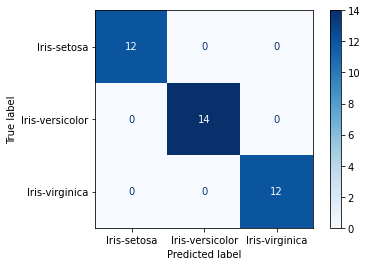

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(model, X_test, y_test, cmap = plt.cm.Blues)
plt.show()

In [ ]:
print(classification_report(y_test, y_preds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



# Used Best k only. (which is 8)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train the k-Nearest Neighbor classifier with the current value of k
model = KNeighborsClassifier(n_neighbors=bestK,weights='distance')
model.fit(X_train, y_train)

# Evaluate the model on validation set 
val_predictions = model.predict(X_train)
acc = accuracy_score(y_train, val_predictions)
f1 = f1_score(y_train, val_predictions, average="weighted")

print("For k = {:d}, test accuracy = {:.2f}, f1 score = {:.2f}".format(bestK,acc, f1))
#,weights='uniform'


For k = 8, test accuracy = 1.00, f1 score = 1.00


# Split data as 50% training & 50% testing

---



In [ ]:
X_trainv2, X_testv2, y_trainv2, y_testv2 = train_test_split(data, labels, test_size=0.5) # X_trainv2 -> 50%, X_testv2 -> 50%

Tried k value found from previous split with new test data.</br>
</br>
When i compare my observations between 50-50 split and 75-25 split, i see that accuracy and f1 score is lower when i split the data 50 training and 50 testing. When i used 75 training, accuracy is higher.</br></br>
The reason is that when we train less data samples, our capability to predict unknown samples will be lower. Since we train 75% of the data earlier, accuracy and f1 scores were higher due to training more data.




In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train the k-Nearest Neighbor classifier with the current value of k
model = KNeighborsClassifier(n_neighbors=bestK)
model.fit(X_trainv2, y_trainv2)

# Evaluate the model on validation set 
val_predictionsv2 = model.predict(X_trainv2)
acc = accuracy_score(y_trainv2, val_predictionsv2)
f1 = f1_score(y_trainv2, val_predictionsv2, average="weighted")

print("For k = {:d}, test accuracy = {:.2f}, f1 score = {:.2f}".format(bestK,acc, f1))

For k = 8, test accuracy = 0.97, f1 score = 0.97
